In [49]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

## California Regulation 
In August of 2022, California approved new legislation requring that all new cars sold beginning of 2035 are zero emission vehicles. According to the New York Times, California's vehicle conversion "is widely expected to accelerate the global transition toward electric vehicles".
This law followed with detail planning of year by year goals of electric vehicle proportions which we will examine and model. 
We now examine the population of electric, hybrid and combustion vehicles in California specifically over several decades beginning with 2010. By state legislation, California is requiring that all new cars sold beginning 2035 are zero emission vehicles. This includes battery electric vehicles, plug-in hybrid electric vehicles as well as fuel cell electric vehicles (https://ww2.arb.ca.gov/resources/documents/cars-and-light-trucks-are-going-zero-frequently-asked-questions#:~:text=Can%20I%20still%20drive%20my,and%20fuel%20cell%20electric%20vehicles.) In an effort to analyze the production of vehicles in California, we will examine the population of electric and combustion vehicles over several decades beginning with 2010. In this particular scenario, we will not differentiate hybrid from electric as the law only requires dismissal of combustion car sales and thus we assume that electric includes any form of a zero emission vehicle, including battery electric vehicles, plug-in hybrid electric vehicles as well as fuel cell electric vehicles. In order to reduce complications, we are only accounting for the population of cars sold within the state of California rather than modeling the purchases of California residents who may purchase cars outside the state. The data we have obtained below comes from historic data as well as several predictive points based on the current status of the conversion to electric sales in California. We see that our model closely resembles the general shape of the data. Our model however gives a smaller 
dataset = https://californiaglobe.com/fr/25-4-of-all-new-cars-sold-in-california-now-electric/#:~:text=According%20to%20a%20new%20California,electric%20car%20sales%20by%202035. 

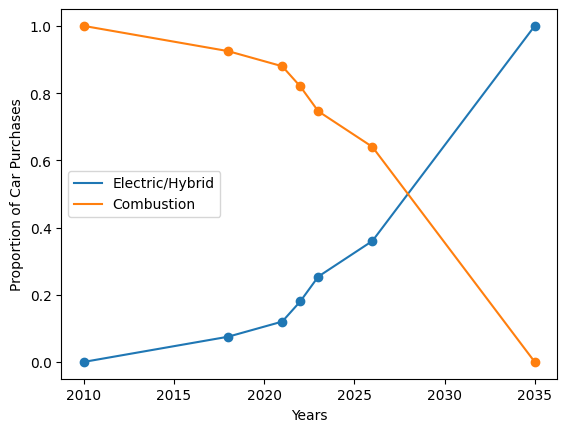

In [103]:
eh = [0,.075,.12,.18,.254, .36, 1]
c = [1, 1-.075, 1-.12, 1-.18,1-.254, 1-.36, 0]
t = [2010,2018,2021,2022,2023,2026,2035]

plt.plot(t,eh, label = "Electric/Hybrid")
plt.scatter(t,eh)
plt.plot(t,c, label = "Combustion")
plt.scatter(t,c)
plt.xlabel("Years")
plt.ylabel("Proportion of Car Purchases")
plt.legend()
plt.show()

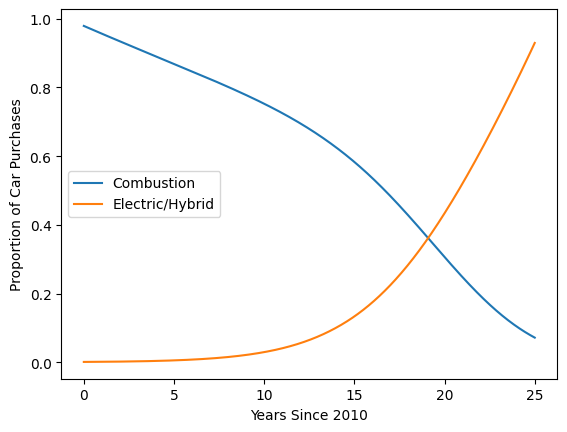

1000
400
Combustion:  0.7523132784873985
Electric:  0.029464218767348806


In [104]:
# build model
def model(t, cars, ec, ce, c, e):
    return np.array([(ec)*cars[0]*cars[1] + c*cars[0],
                     (ce)*cars[0]*cars[1] + e*cars[1]])

# constants
ec = -0.4 # rate from electric to combustion
ce = .3 # rate from combustion to electric
c = -0.023# rate of new combustion
e = 0.1 # rate of new electric


# initial conditions
C = 0.9792
E = 0.0008

# time points
t0 = 0
tf = 25

# solve ODE
sol = solve_ivp(model, [t0, tf], [C,E], args=(ec, ce, c,e), t_eval=np.linspace(t0, tf, 1000))

# plot
plt.plot(sol.t, sol.y[0], label="Combustion")
plt.plot(sol.t, sol.y[1], label="Electric/Hybrid")
#plt.title("EV Adoption")
plt.xlabel("Years Since 2010")
plt.ylabel("Proportion of Car Purchases")
plt.legend()
plt.show()

# print values at t=10
print(len(sol.y[0]))
year = 2020
time = int((year - 2010) * 1000 / tf)
print(time)
print("Combustion: ", sol.y[0][time])
print("Electric: ", sol.y[1][time])

## Results
We see in comparison to actual proportion rates, our model resembles the true data. By 2035, we see that the proportion of combustion sales reaches near zero while electric vehicles is approximately 1 with growing rates that will continue after 2035. Upon closer examination, we recognize that this model is not completely accurate. From 2020-2025, our model produced proportions ranging between .05 and .17 while the true data reflects signficant growth from .10 to .30. This said, we observe that the general trend of rates follows the data.  

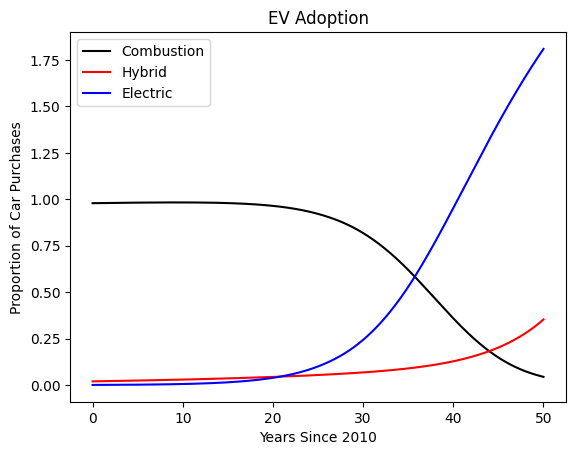

1000
200
Combustion:  0.9832339253848954
Hybrid:  0.02953954067313247
Electric:  0.005638965811886873


In [28]:
# build model
def model(t, cars, ch, he, ec, hc, eh, ce, c, h, e):
    #return np.array([(hc-ch)*cars[0]*cars[1] + (ec-ce)*cars[0]*cars[2] + c*cars[0],
                     #(ch-hc)*cars[0]*cars[1] + (eh-he)*cars[1]*cars[2] + h*cars[1],
                     #(ce-ec)*cars[0]*cars[2] + (he-eh)*cars[1]*cars[2] + e*cars[2]])
    return np.array([(hc-ch)*cars[0]*cars[1] + (ec-ce)*cars[0]*cars[2] + c*cars[0],
                     (ch-hc)*cars[0]*cars[1] + (eh-he)*cars[1]*cars[2] + h*cars[1],
                     (ce-ec)*cars[0]*cars[2] + (he-eh)*cars[1]*cars[2] + e*cars[2]])

# constants
ch = 0.01 # rate from combustion to hybrid
he = 0.1 # rate from hybrid to electric
ec = 0.001 # rate from electric to combustion
hc = 0.001 # rate from hybrid to combustion
eh = 0.15 # rate from electric to hybrid
ce = .15 # rate from combustion to electric
c = 0.001 # rate of new combustion
h = 0.03 # rate of new hybrid
e = 0.05 # rate of new electric

# initial conditions
#C = 0.9792
#H = 0.02
#E = 0.0008
C = 0.9792
H = 0.02
E = 0.0008

# time points
t0 = 0
tf = 50

# solve ODE
sol = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))

# plot
plt.plot(sol.t, sol.y[0], label="Combustion", c="k")
plt.plot(sol.t, sol.y[1], label="Hybrid", c="r")
plt.plot(sol.t, sol.y[2], label="Electric", c="b")
plt.title("EV Adoption")
plt.xlabel("Years Since 2010")
plt.ylabel("Proportion of Car Purchases")
plt.legend()
plt.show()

# print values at t=10
print(len(sol.y[0]))
year = 2020
time = int((year - 2010) * 1000 / tf)
print(time)
print("Combustion: ", sol.y[0][time])
print("Hybrid: ", sol.y[1][time])
print("Electric: ", sol.y[2][time])

If we had more time to play with our model, we could explore more scenarios such as the proportion of electric, hybrid and combustion vehicle production with specific companies. More specifically, we could use this data to see the affect of electric, hybrid and combustion vehicle production on the economy over time and see if there is a direct correlation. In order to test our model further, we can also compre with the performance of other models. 

With additional time for model refinement, we could explore a more extensive array of scenarios, including a examination of the production proportions of electric, hybrid, and combustion vehicles within specific car manufacturing companies. This expanded scope would enable us to discern the effects of electric, hybrid, and combustion vehicle production on the economy over time. Additionally, rather than modeling all of these situations individually, we hope to combine these factors into one robust model that can take into account multiple factors at once. Such a model would account for government incentives, limitations in charging resources and natural disasters into one coehisive model. This would help to eliminate unrealistic assumptions made and incoporate all of the situations discussed into one robust model. 
 compare with other models, examine long term trends 
 Modeling all these situations at once - government incentives, charging resources, natural disasters 

For future work and development of our findings, we could explore a broader range of scenarios, specifically examining the production proportions of electric, hybrid, and combustion vehicles within individual car manufacturing companies. 

Rather than addressing these factors individually, our goal is to integrate them into a comprehensive model that can collectively consider multiple variables. By consolidating government incentives, charging resource limitations, and the impact of natural disasters, this unified model would offer a cohesive framework. This integrated approach not only helps in eliminating unrealistic assumptions but also ensures that the model encompasses all discussed situations, creating a more comprehensive and robust analytical tool.





Across all analyzed factors, we see that there is a general increase over time in hybrid and electric vehicles and a decrease of combustion vehicles. Thus, it is reasonable to conclude that as the production of electric vehicles continues to grow, there arises a need to take proactive measures. This includes but is not limited to establishment of resource availbility such as charging stations. 
